### Import Library

In [1]:
import pandas as pd          
import numpy as np
import matplotlib.pyplot as plt 

### Prepare Data

In [2]:
test_features = pd.read_csv('test_features.csv')
test_features = test_features[['Age','Fare']]
test_features.head(10)

,Age,Fare
0,29.699118,15.2458
1,31.000000,10.5000
2,20.000000,7.9250
3,6.000000,33.0000
4,14.000000,11.2417
5,26.000000,78.8500
6,29.699118,7.7500
7,16.000000,18.0000
8,16.000000,7.7500
9,19.000000,26.2833


### Define Size Bin

In [3]:
def compute_histogram_bins(data, desired_bin_size):
    min_val = np.min(data)
    max_val = np.max(data)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    return bins

### Plot Polar Chart

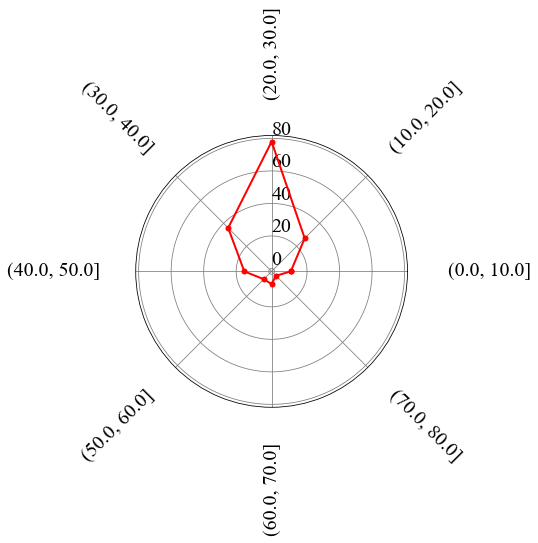

In [4]:
bin_size=10    
bins = compute_histogram_bins(test_features['Age'], bin_size)

pie_chart_data=test_features.groupby(pd.cut(test_features['Age'], bins)).count()

pie_chart_data=pd.concat([pie_chart_data,pie_chart_data.iloc[:1,:]])


dataLenth = 8

angles_1 = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles_1 = np.concatenate((angles_1, [angles_1[0]])) 

labels = pie_chart_data.index

plt.rc('font',family = 'Times New Roman',  size=20)
fig=plt.figure(figsize=(5,5))
ax1=fig.add_subplot(1,1,1, polar=True)

ax1.plot(angles_1, pie_chart_data['Age'], color='Red', marker='o',markersize=5, linewidth=2)

ax1.set_rlabel_position(90) 

ax1.set_xticklabels(labels[:8], fontsize=10)

plt.gcf().canvas.draw()
angles = np.linspace(0,2*np.pi,len(ax1.get_xticklabels())+1)
angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
angles = np.rad2deg(angles)
labels = []
for label, angle in zip(ax1.get_xticklabels(), angles):
    x,y = label.get_position()
    lab = ax1.text(x,y-.5, label.get_text(), transform=label.get_transform(),
                  ha=label.get_ha(), va=label.get_va())
    lab.set_rotation(angle)
    labels.append(lab)
ax1.set_xticklabels([])
ax1.grid(color='grey')
plt.show()